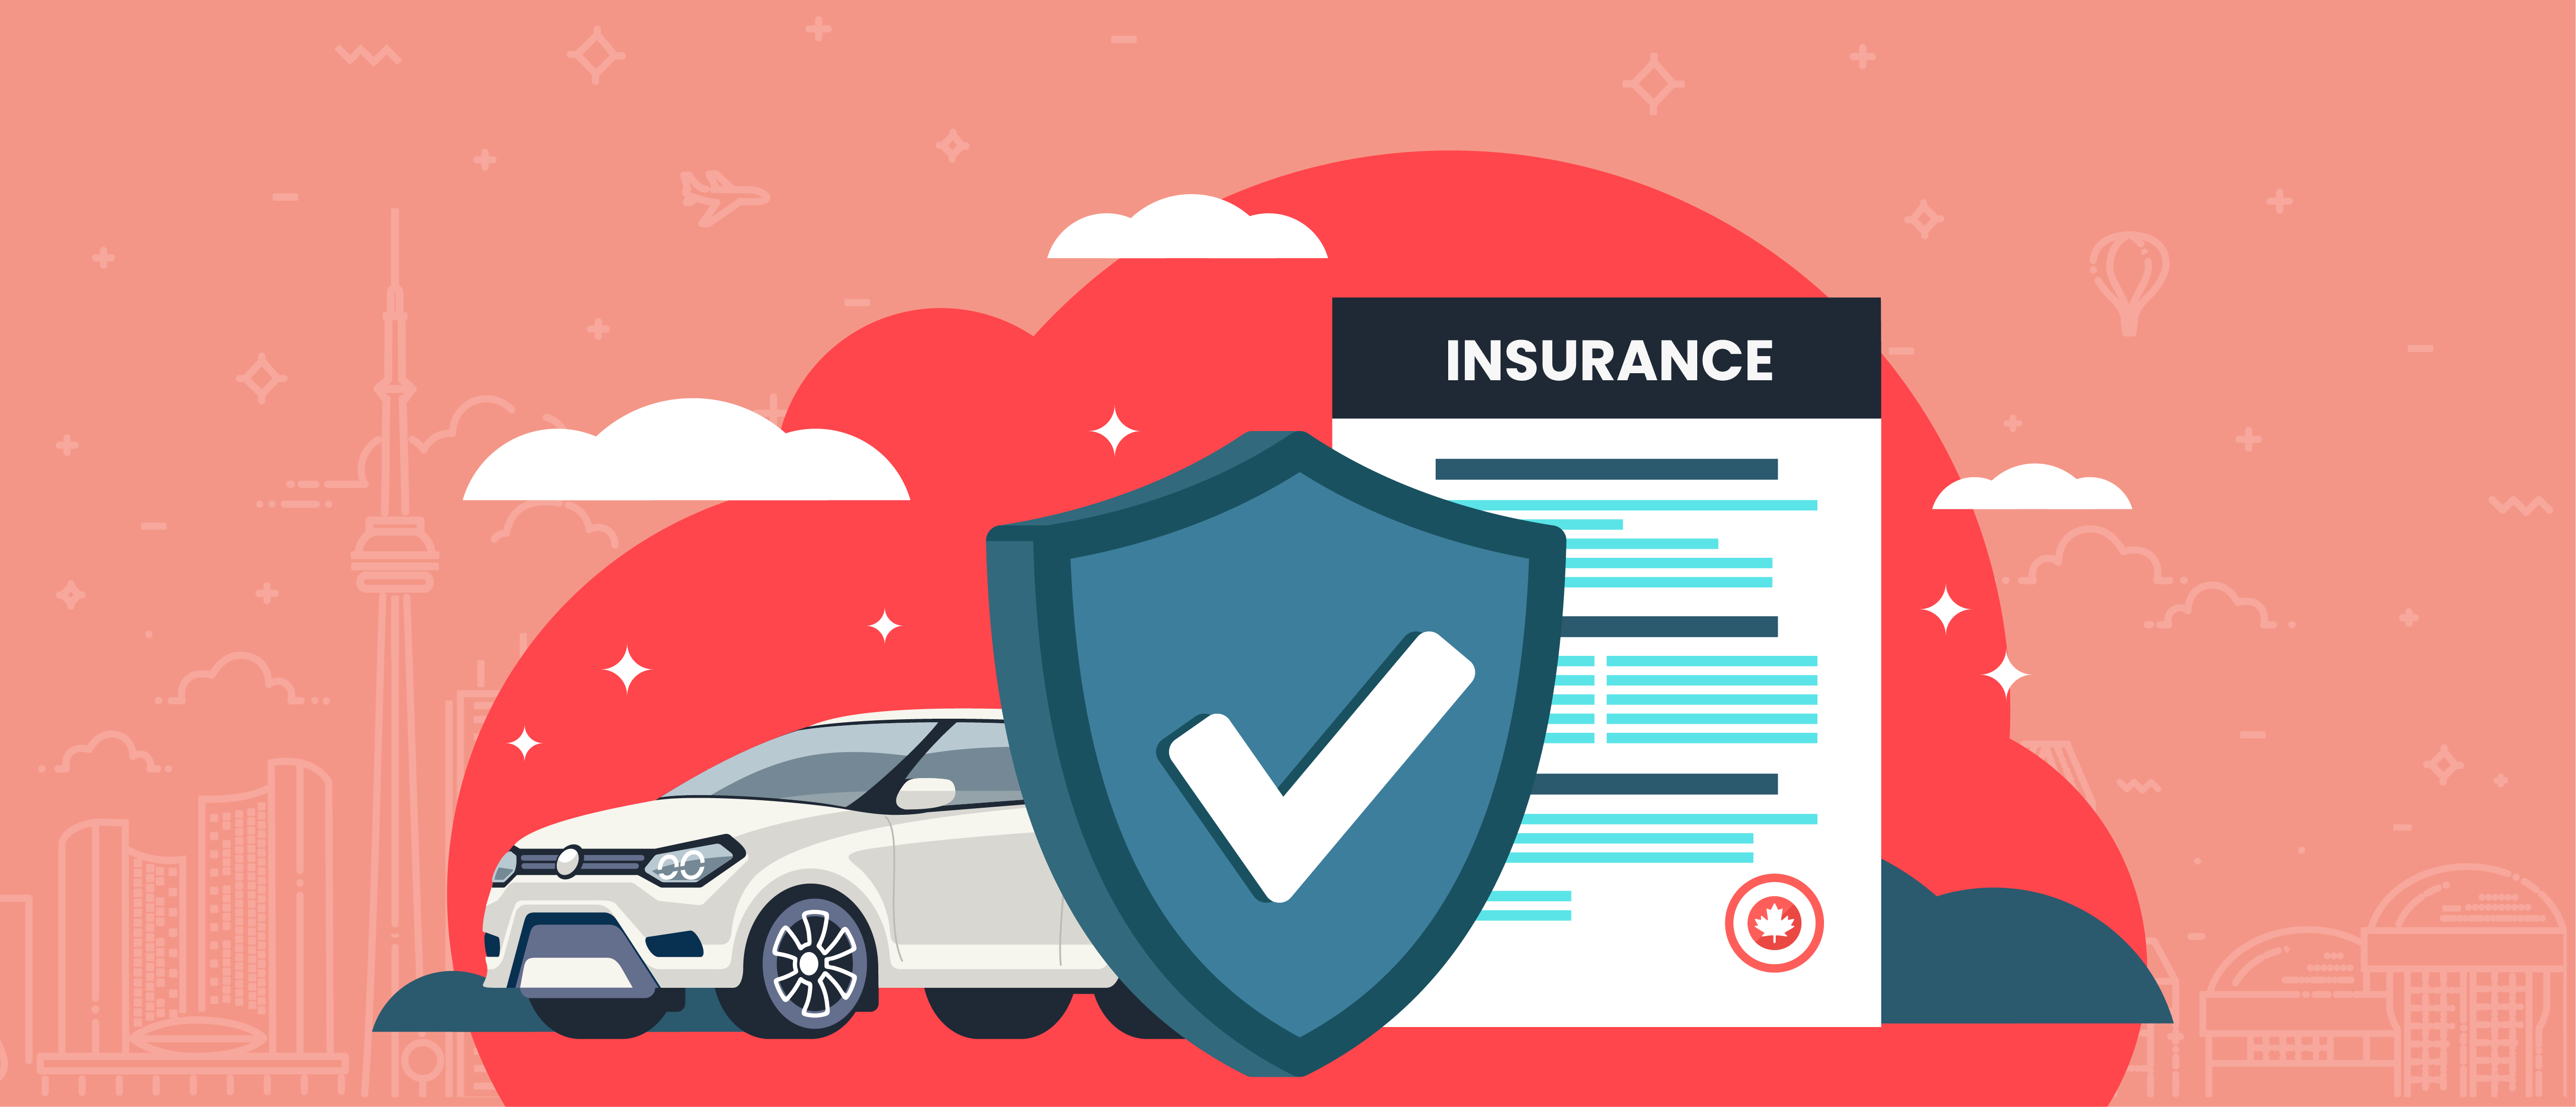

# Project Dataset - Road Safety Data
Published by: The UK Department for Transport, Last updated: 24 February 2022

Table of Contents 
1. Importing Libraries
2. Business Objective
3. Data Preparation
4. Data Splitting
5. Exploratory Data Analysis
6. Data Cleaning And Transformation
7. Conclusion
8. Data Export

# 1. Importing Libraries

In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 2. Business Objective
Insurance is a risk-management technique used for hedging against various uncertain losses. It involves a contractual agreement between two parties in which one party promises to protect another party from uncertainties and losses.

We want to build a model that predicts the severity rating of vehicle accidents in the UK. This would allow the business determine the degree of accident severity per demography and geographical location within the UK and how much premium should be paid.

The predictive model will use Accident Severity as the Dependent Variable and Vehicle Type, Engine Capacity, Age of Vehicle as well as the demographic factors of the driver as the Independent Variables.

# 3. Data Preparation

## 3.0 Loading Accident Dataset

In [5]:
# selecting columns from accident dataset that are suitable for our business objective analysis
cols= ["accident_reference", "longitude", "latitude", "accident_severity","date"]
# reading the file
df1= pd.read_csv("dft-road-casualty-statistics-accident-2020.csv", usecols=cols)
df1.head()

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accident_reference,longitude,latitude,accident_severity,date
0,10219808,-0.254001,51.462262,3,04/02/2020
1,10220496,-0.139253,51.470327,3,27/04/2020
2,10228005,-0.178719,51.529614,3,01/01/2020
3,10228006,-0.001683,51.541210,2,01/01/2020
4,10228011,-0.137592,51.515704,3,01/01/2020


In [6]:
df1.shape

(91199, 5)

In [7]:
# checking for missing values
df1.isnull().sum()

accident_reference     0
longitude             14
latitude              14
accident_severity      0
date                   0
dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accident_reference  91199 non-null  object 
 1   longitude           91185 non-null  float64
 2   latitude            91185 non-null  float64
 3   accident_severity   91199 non-null  int64  
 4   date                91199 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 3.5+ MB


## 3.1 Accident Dataset Preparation

In [9]:
# convert the date column to date time format
df1['date'] = pd.to_datetime(df1['date'], format="%d/%m/%Y")
#Check the type 
print(df1["date"].dtypes)

datetime64[ns]


 replacing `accident_severity` to contain nominal values:

accident_dict = {

    1:	"Fatal",
    2:	"Serious",
    3:	"Slight"
}

In [10]:
df1["accident_severity"].value_counts()

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

In [11]:
replacement_dict = {
    1: "Fatal",
    2: "Serious",
    3: "Slight"
}
df1['accident_severity'] = df1['accident_severity'].map(replacement_dict)

In [12]:
#inspect if all are correct data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   accident_reference  91199 non-null  object        
 1   longitude           91185 non-null  float64       
 2   latitude            91185 non-null  float64       
 3   accident_severity   91199 non-null  object        
 4   date                91199 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.5+ MB


## 3.2 Loading Vehicle Dataset

In [13]:
# selecting columns from vehicle dataset that are suitable for our business objective analysis
cols= ["accident_reference", "vehicle_type", "sex_of_driver", "age_of_driver","engine_capacity_cc", "age_of_vehicle","driver_home_area_type"]
# reading the file
df2= pd.read_csv("dft-road-casualty-statistics-vehicle-2020.csv", usecols=cols)
df2.head()

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accident_reference,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,driver_home_area_type
0,10219808,9,2,32,1968,6,1
1,10220496,9,1,45,1395,2,1
2,10228005,9,3,-1,-1,-1,-1
3,10228006,8,1,44,1798,8,1
4,10228011,9,1,20,2993,4,-1


In [14]:
df2.shape

(167375, 7)

In [15]:
# checking for missing values
df2.isnull().sum()

accident_reference       0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
dtype: int64

no missing values occurs in the vahicle data set

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   accident_reference     167375 non-null  object
 1   vehicle_type           167375 non-null  int64 
 2   sex_of_driver          167375 non-null  int64 
 3   age_of_driver          167375 non-null  int64 
 4   engine_capacity_cc     167375 non-null  int64 
 5   age_of_vehicle         167375 non-null  int64 
 6   driver_home_area_type  167375 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.9+ MB


## 3.3 Vehicle Dataset Inspection

In [17]:
# inspecting to see which car type involves in most accidents in %
df2['vehicle_type'].value_counts(normalize=True)*100

9     68.197162
1     10.017028
19     6.176550
3      4.494698
5      2.260792
8      1.560568
21     1.494249
11     1.322181
4      1.010306
90     0.707991
2      0.673936
98     0.640478
20     0.536520
97     0.285586
17     0.259895
10     0.134429
22     0.112920
23     0.055564
16     0.053771
18     0.005377
Name: vehicle_type, dtype: float64

We can see that most accidents that occures on the road are from cars (9) which accounts to 68.2% of all accidents and 10% are from pedal cycles (1). All others vehicles type are rare for accidents to occure and having too many categories, and especially rare categories, leads to a noisy dataset. Therefore for for better interpretation we will join all other vehicle types to one label called others

In [18]:
#  replacing `vehicle_type` to contain nominal values:
replacement_dict_vehicle_type = {
    9:"car",     
    1:"pedal cycle",
    19:"others",    
    3:"others" ,     
    5: "others" ,   
    8: "others" ,    
    21:"others"  ,   
    11:  "others" ,  
    4 : "others" ,  
    90 : "others" , 
    2  : "others",  
    98 : "others",  
    20 : "others" , 
    97 : "others" , 
    17 : "others",  
    10 : "others",  
    22 : "others" , 
    23 :"others"  ,
    16 :"others"   ,
    18 : "others" }

df2['vehicle_type'] = df2['vehicle_type'].map(replacement_dict_vehicle_type)

In [19]:
df2.head()

,accident_reference,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,driver_home_area_type
0,10219808,car,2,32,1968,6,1
1,10220496,car,1,45,1395,2,1
2,10228005,car,3,-1,-1,-1,-1
3,10228006,others,1,44,1798,8,1
4,10228011,car,1,20,2993,4,-1


<AxesSubplot:>

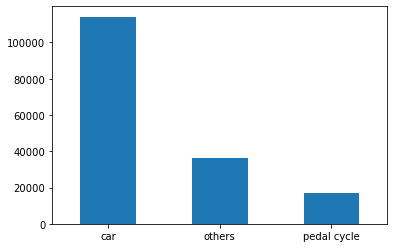

In [20]:
#visualizing it using bar graph
df2["vehicle_type"].value_counts(ascending=False).plot(kind="bar", rot = 0)

In [21]:
df2["sex_of_driver"].value_counts()

 1    106240
 2     41820
 3     19302
-1        13
Name: sex_of_driver, dtype: int64

In [22]:
#  replacing `sex_of_driver` to contain nominal values:
replacement_sex_of_driver = {
    1: "male",
    2: "female",
    3: np.NaN,
    -1: np.NaN
}
df2['sex_of_driver'] = df2['sex_of_driver'].map(replacement_sex_of_driver)

df2["sex_of_driver"].value_counts()

male      106240
female     41820
Name: sex_of_driver, dtype: int64

In [23]:
df2["engine_capacity_cc"].value_counts()

-1       43603
 1598     9171
 1995     5440
 1968     5292
 998      4830
         ...  
 722         1
 1489        1
 1165        1
 3596        1
 2689        1
Name: engine_capacity_cc, Length: 985, dtype: int64

In [24]:
# replacing -1(missing values) for engine capacity with null values
df2["engine_capacity_cc"] = df2["engine_capacity_cc"].replace(-1, np.NaN)
df2["engine_capacity_cc"].value_counts()

1598.0    9171
1995.0    5440
1968.0    5292
998.0     4830
125.0     4825
          ... 
3669.0       1
111.0        1
2084.0       1
2470.0       1
4235.0       1
Name: engine_capacity_cc, Length: 984, dtype: int64

In [25]:
df2["age_of_vehicle"].value_counts()

-1     43072
 1      9310
 4      9260
 5      8746
 3      8512
       ...  
 62        1
 92        1
 93        1
 96        1
 68        1
Name: age_of_vehicle, Length: 75, dtype: int64

In [26]:
# replacing -1(missing values) for age of vehicles with null values
df2["age_of_vehicle"] = df2["age_of_vehicle"].replace(-1, np.NaN)
df2["age_of_vehicle"].value_counts()

1.0     9310
4.0     9260
5.0     8746
3.0     8512
2.0     8400
        ... 
96.0       1
47.0       1
84.0       1
92.0       1
93.0       1
Name: age_of_vehicle, Length: 74, dtype: int64

In [27]:
df2["driver_home_area_type"].value_counts()

 1    110099
-1     31215
 3     14820
 2     11241
Name: driver_home_area_type, dtype: int64

In [28]:
#  replacing `driver_home_area_type` to contain nominal values:
replacement_driver_home_area_type = {
    1: "Urban area",
    2: "Small town",
    3: "Rural",
    -1: np.NaN
}
df2['driver_home_area_type'] = df2['driver_home_area_type'].map(replacement_driver_home_area_type)

df2["driver_home_area_type"].value_counts()

Urban area    110099
Rural          14820
Small town     11241
Name: driver_home_area_type, dtype: int64

In [29]:
df2["age_of_driver"].value_counts()

-1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 99         2
 3          2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

In [30]:
# replacing -1(missing values) for age_of_driver with null values
df2["age_of_driver"] = df2["age_of_driver"].replace(-1, np.NaN)
df2["age_of_driver"].value_counts()

30.0     5308
29.0     3672
28.0     3622
25.0     3599
27.0     3514
         ... 
97.0        3
98.0        3
3.0         2
99.0        2
100.0       1
Name: age_of_driver, Length: 98, dtype: int64

## 3.4 Data Merging Process

After we have have converted all columns in df1 and df2 to there correct data type and did some modification for easy interpertation later on, now we can merge them both to one data frame

In [31]:
df1.shape

(91199, 5)

In [32]:
df2.shape

(167375, 7)

In [33]:
# we can confirm that the number of unique accident indices in df2 is the same as the number of unique accidents in df1
len(df2['accident_reference'].value_counts())

91200

It appears there is an extra accident that has been documented in the vehicle dataframe which has been not put on the accident dataframe. This could be some mistake

We need to attach columns from accidents (df1) to the vehicle dataframe (df2). The "accident_reference" column from df2 is the basis for the merge (the column is indicated with the "on" argument):

In [34]:
df = pd.merge(df1, df2, on="accident_reference", how="inner")

In [35]:
# the number of rows in the new dataframe is the same as in df2
df.shape

(161487, 11)

In [36]:
df.set_index("accident_reference")

,longitude,latitude,accident_severity,date,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,driver_home_area_type
accident_reference,,,,,,,,,,
10219808,-0.254001,51.462262,Slight,2020-02-04,car,female,32.0,1968.0,6.0,Urban area
10220496,-0.139253,51.470327,Slight,2020-04-27,car,male,45.0,1395.0,2.0,Urban area
10228005,-0.178719,51.529614,Slight,2020-01-01,car,NaN,NaN,NaN,NaN,NaN
10228006,-0.001683,51.541210,Serious,2020-01-01,others,male,44.0,1798.0,8.0,Urban area
10228011,-0.137592,51.515704,Slight,2020-01-01,car,male,20.0,2993.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...
990963826,-5.232567,56.722717,Serious,2020-07-11,others,male,51.0,599.0,14.0,Urban area
990963826,-5.232567,56.722717,Serious,2020-07-11,others,male,53.0,1301.0,4.0,Rural
990963826,-5.232567,56.722717,Serious,2020-07-11,others,male,52.0,1085.0,21.0,Urban area


In [37]:
df.isnull().sum()

accident_reference           0
longitude                   27
latitude                    27
accident_severity            0
date                         0
vehicle_type                 0
sex_of_driver            18616
age_of_driver            22710
engine_capacity_cc       42255
age_of_vehicle           41748
driver_home_area_type    30133
dtype: int64

# 4.0 Data Splitting: Train and Test Split

Since we have cleaned our variables and placed them to there correct data type we can now split our data to traning and testing data sets. As we can see from the bar graph below, the classes in our target variable is not normally distributed, it is unbalanced. Therefore, we will use stratify sampling method to sample our data.

In [38]:
df["accident_severity"].value_counts(normalize = True)*100 

Slight     79.820047
Serious    18.753832
Fatal       1.426121
Name: accident_severity, dtype: float64

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
train_index, test_index = list(stratified_splitter.split(df, df["accident_severity"]))[0]
trainset = df.loc[train_index]
testset = df.loc[test_index]


In [40]:
trainset["accident_severity"].value_counts(normalize=True)*100


Slight     79.820263
Serious    18.753919
Fatal       1.425818
Name: accident_severity, dtype: float64

In [41]:
testset["accident_severity"].value_counts(normalize=True)*100

Slight     79.819184
Serious    18.753483
Fatal       1.427333
Name: accident_severity, dtype: float64

We can see that both trainset and testset have the same proprtion as the targert category in the main df

# 5.0 Exploratory Data Analysis

Now we will do some exploratory data analysis on the training set and set aside the test set in order to avoid data snooping

In [42]:
trainset.head()

,accident_reference,longitude,latitude,accident_severity,date,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,driver_home_area_type
147595,522100398,-2.409318,51.332893,Slight,2020-07-10,car,male,50.0,1968.0,5.0,Urban area
18245,10257275,-0.077918,51.397916,Slight,2020-07-18,car,female,22.0,1598.0,14.0,Urban area
102769,371012879,1.160247,52.067837,Slight,2020-12-01,car,female,47.0,1998.0,0.0,Urban area
86562,302001350,-1.818049,53.242238,Serious,2020-11-22,car,male,41.0,2191.0,4.0,Urban area
151354,552000138,-1.850112,50.870452,Slight,2020-02-01,car,NaN,NaN,1582.0,4.0,NaN


In [43]:
# summary statistic on numerical variables
trainset.describe()

,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle
count,129168.000000,129168.000000,110957.000000,95329.000000,95729.000000
mean,-1.128897,52.262495,40.231234,1799.751052,8.245568
std,1.313969,1.198195,16.290116,1531.989042,5.690354
min,-7.412812,49.970479,3.000000,7.000000,0.000000
25%,-2.008444,51.452134,27.000000,1242.000000,4.000000
50%,-0.964363,51.734894,37.000000,1596.000000,7.000000
75%,-0.121272,53.179604,52.000000,1995.000000,12.000000
max,1.756257,60.541144,99.000000,16400.000000,96.000000


In [44]:
# summary statistic on categorical variable
trainset.describe(exclude = ['float', 'int64'])

<ipython-input-44-dba3e3b5ecd1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainset.describe(exclude = ['float', 'int64'])


,accident_reference,accident_severity,date,vehicle_type,sex_of_driver,driver_home_area_type
count,129189,129189,129189,129189,114188,105044
unique,80620,3,366,3,2,3
top,430342787,Slight,2020-02-06 00:00:00,car,male,Urban area
freq,11,103119,628,88211,81846,85154
first,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2020-12-31 00:00:00,NaN,NaN,NaN


## 5.1 Univariate Analysis

Now we will explore each variable by itself in order to have an idea about what we are dealing with and if there is any outliers, ,missing values, anomalies etc..

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'age_of_driver'}>],
       [<AxesSubplot:title={'center':'engine_capacity_cc'}>,
        <AxesSubplot:title={'center':'age_of_vehicle'}>]], dtype=object)

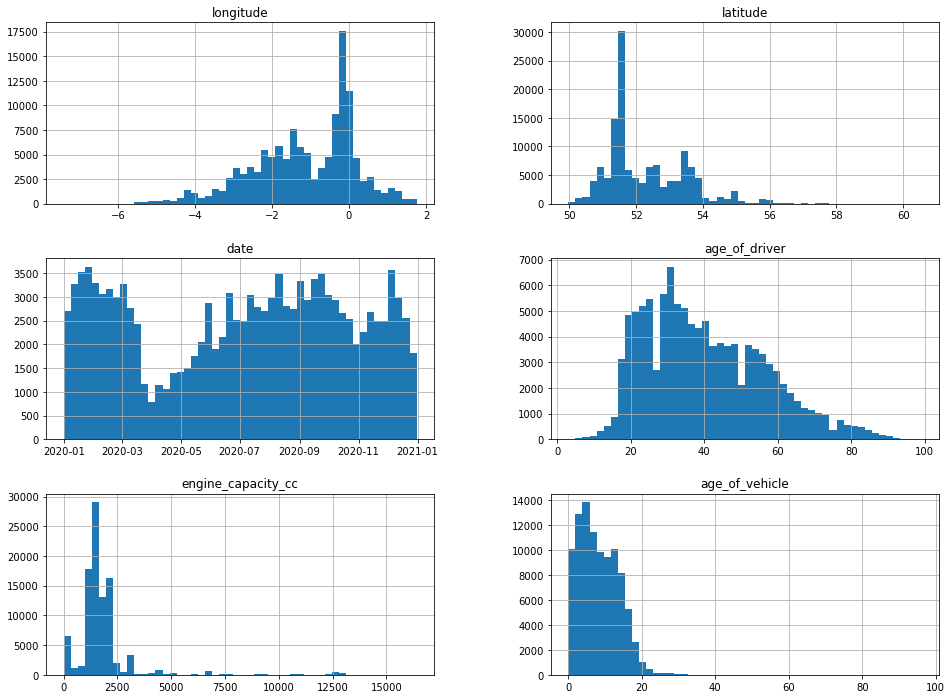

In [45]:
trainset.hist(bins = 50, figsize = [16, 12])

We can see from the above histograms that most numerical variables are heavily-tailed which means there is the presence of outliers.These outliers will be dealt with later via log-transformation during the preprocessing stage. For variables age_of_vehicle and engine_capacity_cc the graphs are right skewed were most of the vehicles that had an accident were less than 20 years old cars and drove cars with low engine_capacity around 2000cc (non-fast cars). 

trainset["sex_of_driver"].value_counts().plot.bar(rot=70, title="Gender")

We can see from the above bar graph that most accidents occured by males rather than females, which makes sense since males are more prone to speed while driving

<AxesSubplot:title={'center':'Area Type'}>

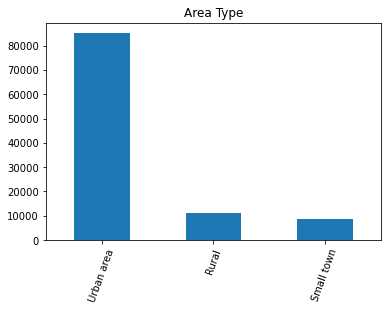

In [46]:
trainset["driver_home_area_type"].value_counts().plot.bar(rot=70, title="Area Type")

From the above, It is seen that most accidents occured within the Urban areas compared to the rural and the small towns. This is possibly due to the larger number of vehicles and drivers in the city.

<AxesSubplot:title={'center':'Vehicle Type'}>

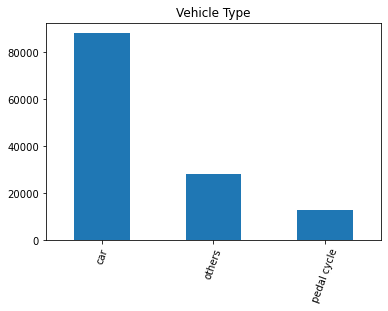

In [47]:

trainset["vehicle_type"].value_counts().plot.bar(rot=70, title="Vehicle Type")

The plot above also shows that cars were the most prone to accidents compared to other vehicles such as trucks, minibus, vans, buses, coaches, etc and pedal cycle.

<AxesSubplot:title={'center':'Severity'}>

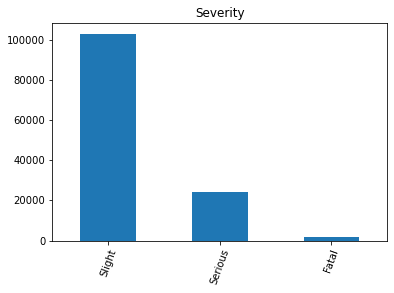

In [48]:
trainset["accident_severity"].value_counts().plot.bar(rot=70, title="Severity")

we can see from our dependent varibale that most of the accidents that occurs are slight and only small porportion of the accidents are fatal. 

In [49]:
trainset.head()

,accident_reference,longitude,latitude,accident_severity,date,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,driver_home_area_type
147595,522100398,-2.409318,51.332893,Slight,2020-07-10,car,male,50.0,1968.0,5.0,Urban area
18245,10257275,-0.077918,51.397916,Slight,2020-07-18,car,female,22.0,1598.0,14.0,Urban area
102769,371012879,1.160247,52.067837,Slight,2020-12-01,car,female,47.0,1998.0,0.0,Urban area
86562,302001350,-1.818049,53.242238,Serious,2020-11-22,car,male,41.0,2191.0,4.0,Urban area
151354,552000138,-1.850112,50.870452,Slight,2020-02-01,car,NaN,NaN,1582.0,4.0,NaN


## 5.2 Bivariate Analysis

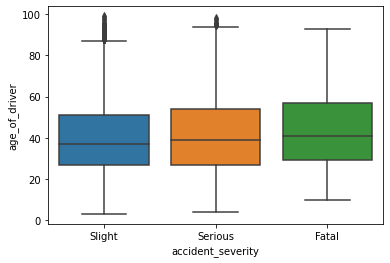

In [50]:
# Categorical- numerical
bp = sns.boxplot(x=trainset["accident_severity"], y=trainset["age_of_driver"])


We can see from the above box plot that the median age of drivers for all accident severity are relatively the same around 36 years old. We can also see some outliers in the distribution for slight and serious accidents which we will deal with them later on during the pre-processing stage

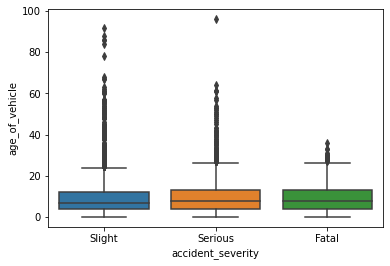

In [51]:
bp2 = sns.boxplot(x=trainset["accident_severity"], y=trainset["age_of_vehicle"])

The above box plot indicates that there are alot of outliers in that age_of_vehicle variable, therefore might have to do feature scaling later on for normalize that data. We also can see that the median age of the car that was involved in slight, serious and fata accidents were around 8-10 years old.

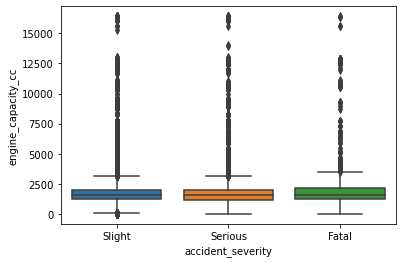

In [52]:
bp3 = sns.boxplot(x=trainset["accident_severity"], y=trainset["engine_capacity_cc"])

We can see that the above box plot detects alot of outliers. Moreover, we can see that the median engine capacity that were involved in all 3 accident severity were around 2000cc.

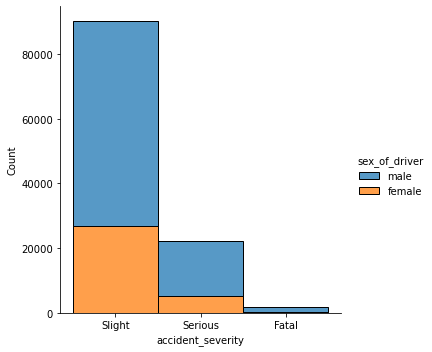

In [53]:
# categorical-categorical
sns.displot(trainset,x="accident_severity", hue="sex_of_driver",multiple="stack")

we can see from the above stackbar than males are dominating in all 3 accident severity. They are the ones involved mostly in all accidents.

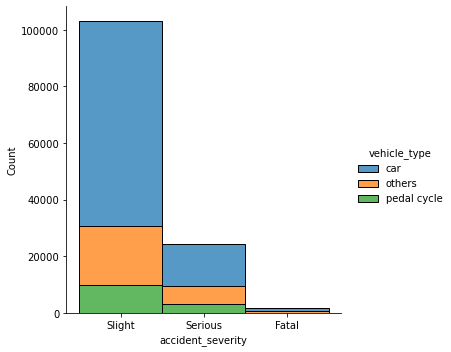

In [54]:
sns.displot(trainset,x="accident_severity", hue="vehicle_type",multiple="stack")

We can see from the above stackbar that most accidents involved are slight in severity. Moreover most accidents that occur are from car vehicles.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'which area type accidents mostly occurs')

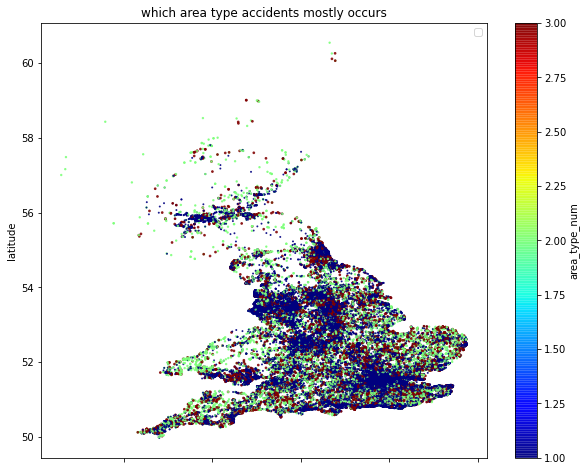

In [55]:
# creating a new numberic variable for driver_home_area_type since the scatter plot takes only numeric values
replacement_driver_home_area_type1 = {
    "Urban area": 1,
    "Small town": 2,
    "Rural":3
}
#assigning it to new variable so we drop it later
trainset["home_area_type_num"] = trainset["driver_home_area_type"].map(replacement_driver_home_area_type1)

#Display a scatter plots to to see where the majority of accidents occure
trainset.plot(kind="scatter",
            x="longitude",
            y="latitude", 
            alpha=0.8,                              
            s="area_type_num",
            c="area_type_num",                 
            cmap=plt.get_cmap("jet"),              
            colorbar=True,                          
            figsize=[10,8]
)

plt.legend()
plt.title("which area type accidents mostly occurs")


The scattered graph above represents the UK were the scatter points are the accidents that occured all over the uk, and the blues points are in the urban area, the light green is in rural areas and red points are in small towns. We can see most of the scatterd points are filled with green and blue which means most accidents happen in urban and rural areas

In [56]:
# we can now drop the area_type_num variable
trainset.drop("area_type_num", axis = 1, inplace=True)

In [57]:
#check if it dropped
trainset.head()

,accident_reference,longitude,latitude,accident_severity,date,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,driver_home_area_type
147595,522100398,-2.409318,51.332893,Slight,2020-07-10,car,male,50.0,1968.0,5.0,Urban area
18245,10257275,-0.077918,51.397916,Slight,2020-07-18,car,female,22.0,1598.0,14.0,Urban area
102769,371012879,1.160247,52.067837,Slight,2020-12-01,car,female,47.0,1998.0,0.0,Urban area
86562,302001350,-1.818049,53.242238,Serious,2020-11-22,car,male,41.0,2191.0,4.0,Urban area
151354,552000138,-1.850112,50.870452,Slight,2020-02-01,car,NaN,NaN,1582.0,4.0,NaN


# 6.0 Data Cleaning and Transformation

## 6.1 Impute Missing Values

Before we have split our data we saw that there are a significant amount of missing values. Imputing them would create a bias in our dataset. Therefore removing the empty values is a good idea.

In [58]:
#removing null values from training set
trainset= trainset.dropna()

In [59]:
# all variables are cleaned
trainset.isnull().sum()

accident_reference       0
longitude                0
latitude                 0
accident_severity        0
date                     0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
dtype: int64

In [60]:
trainset.shape

(80117, 11)

In [61]:
testset.shape

(32298, 11)

In [62]:
# applying the same imputation method on testing set as well
testset= testset.dropna()

In [63]:
testset.shape

(20106, 11)

In [64]:
# All variables are cleaned
testset.isnull().sum()

accident_reference       0
longitude                0
latitude                 0
accident_severity        0
date                     0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
dtype: int64

## 6.2 Feature Engineering

During our EDA process we did'nt extract any useful information/insight for our variable "date" that would give help insights in our business objective. Therefore, we will do some feature engineering by extracting the months and weekdays from the date variables, that would give us better insight like which months during the year are most likely for accidents to occur and the severity of accidents. This way if a cutomer is applying for insurance for a specific month, the company can figure out which package is most suitable for this candidate.

In [65]:
#creating a new variables called month and weekday for train and testing set
trainset["month"]= trainset['date'].dt.month
trainset["weekday"]= trainset["date"].dt.weekday
testset["month"]= testset['date'].dt.month
testset["weekday"]= testset["date"].dt.weekday

<ipython-input-65-704b0f924c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset["month"]= trainset['date'].dt.month
<ipython-input-65-704b0f924c03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset["weekday"]= trainset["date"].dt.weekday


In [66]:
trainset[["weekday","date"]]

,weekday,date
147595,4,2020-07-10
18245,5,2020-07-18
102769,1,2020-12-01
86562,6,2020-11-22
120885,2,2020-09-02
...,...,...
74820,3,2020-08-06
42729,5,2020-04-18
19266,5,2020-07-25
97420,0,2020-03-09


In [67]:
# changing weekday variable to its data type
replacement_weekday_type = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
    
}
trainset['weekday'] = trainset['weekday'].map(replacement_weekday_type)
#applying it for the test set as well
testset['weekday'] = testset['weekday'].map(replacement_weekday_type)

trainset["weekday"].value_counts()

<ipython-input-67-47f3e9ca9e41>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['weekday'] = trainset['weekday'].map(replacement_weekday_type)


Friday       13314
Thursday     12299
Wednesday    11957
Tuesday      11448
Monday       11229
Saturday     10845
Sunday        9025
Name: weekday, dtype: int64

In [68]:
# changing weekday variable to its data type
replacement_month_type = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "June",
    7: "July",
    8: "Aug",
    9: "Sept",
    10: "Oct",
    11: "Nov",
    12:"Dec"
    
}
trainset['month'] = trainset['month'].map(replacement_month_type)
# applying it for the test set as well
testset['month'] = testset['month'].map(replacement_month_type)

trainset["month"].value_counts()

<ipython-input-68-fa20c6b33835>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['month'] = trainset['month'].map(replacement_month_type)


Jan     8672
Feb     8212
Sept    8056
Aug     7696
Dec     7347
July    7213
Oct     7183
Nov     6225
Mar     6088
June    5935
May     4791
Apr     2699
Name: month, dtype: int64

In [69]:
trainset.shape

(80117, 13)

In [70]:
testset.shape

(20106, 13)

## 6.3 Log-Transform Heavy-Tailed Variables

For all numerical variables that were skewed when we saw during our EDA, we will need to scale them using logarithmic function to normalize it.

In [71]:
trainset.isnull().sum()

accident_reference       0
longitude                0
latitude                 0
accident_severity        0
date                     0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
month                    0
weekday                  0
dtype: int64

In [72]:
for x in ["age_of_driver",
          "engine_capacity_cc", "age_of_vehicle"]:
    # add 1 so that 0s remain 0s
    trainset[x] = np.log(trainset[x] + 1)
    testset[x] = np.log(testset[x] + 1)

<ipython-input-72-6b9b2f1f31a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset[x] = np.log(trainset[x] + 1)


In [73]:
trainset.isnull().sum()

accident_reference       0
longitude                0
latitude                 0
accident_severity        0
date                     0
vehicle_type             0
sex_of_driver            0
age_of_driver            0
engine_capacity_cc       0
age_of_vehicle           0
driver_home_area_type    0
month                    0
weekday                  0
dtype: int64

## 6.4 Onehot Encoder

In [74]:
from sklearn.preprocessing import OneHotEncoder


def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in ["vehicle_type", "sex_of_driver", "driver_home_area_type", "month","weekday"]:
    trainset, testset = get_dummies(trainset, testset, col_name)

# check if the dummies are produced correctly in the trainset
trainset.head()

<ipython-input-74-4be1f31366ba>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset[new_col_name] = transformed[:,i]
<ipython-input-74-4be1f31366ba>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset[new_col_name] = transformed[:,i]
<ipython-input-74-4be1f31366ba>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,accident_reference,longitude,latitude,accident_severity,date,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
147595,522100398,-2.409318,51.332893,Slight,2020-07-10,car,male,3.931826,7.585281,1.791759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18245,10257275,-0.077918,51.397916,Slight,2020-07-18,car,female,3.135494,7.377134,2.708050,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
102769,371012879,1.160247,52.067837,Slight,2020-12-01,car,female,3.871201,7.600402,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86562,302001350,-1.818049,53.242238,Serious,2020-11-22,car,male,3.737670,7.692570,1.609438,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
120885,440337441,-1.271586,50.872718,Serious,2020-09-02,car,male,4.356709,7.576097,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
# check if the dummies are produced correctly in the testset
testset.head()

,accident_reference,longitude,latitude,accident_severity,date,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,...,May,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
53342,100962533,-1.370138,54.898355,Slight,2020-07-06,car,male,3.295837,7.670429,1.386294,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99343,360950597,1.249396,52.428332,Slight,2020-05-02,car,male,4.499810,7.600402,2.772589,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37646,040920396,-2.266167,53.829952,Slight,2020-01-17,car,female,3.970292,7.585281,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28420,10271884,-0.066040,51.466129,Slight,2020-10-04,car,female,4.174387,7.200425,2.833213,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
70203,170H10220,-1.219117,54.687695,Slight,2020-03-12,others,male,4.060443,8.543446,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now we can delete the original (i.e., categorical) columns and any non needed ones from both the training and the test sets:

In [76]:
cols_to_drop = ["vehicle_type", "sex_of_driver", "month", "weekday","driver_home_area_type","date","accident_reference"]
trainset.drop(columns=cols_to_drop, inplace=True)
testset.drop(columns=cols_to_drop, inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 6.3 Feature Scaling

We fit and transform a StandardScaler

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# take the target variable out before scaling
trainset_target = trainset["accident_severity"].values
trainset_predictors = trainset.drop("accident_severity", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
trainset['accident_severity'] = trainset_target

# inspect the data
trainset.head()

,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle,others,male,Small town,Urban area,Aug,...,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,accident_severity
0,-0.915724,-0.760740,0.699551,0.435414,-0.270062,-0.552275,0.675423,-0.31014,0.497338,-0.325987,...,-0.290249,-0.313825,-0.334356,-0.403737,-0.395673,-0.356298,-0.425856,-0.408305,-0.418838,Slight
1,0.794882,-0.707889,-1.327203,0.181216,0.962724,-0.552275,-1.480554,-0.31014,0.497338,-0.325987,...,-0.290249,-0.313825,-0.334356,-0.403737,2.527342,-0.356298,-0.425856,-0.408305,-0.418838,Slight
2,1.703353,-0.163372,0.545255,0.453881,-2.680711,-0.552275,-1.480554,-0.31014,0.497338,-0.325987,...,-0.290249,-0.313825,-0.334356,-0.403737,-0.395673,-0.356298,-0.425856,2.449151,-0.418838,Slight
3,-0.481895,0.791191,0.205402,0.566439,-0.515359,-0.552275,0.675423,-0.31014,0.497338,-0.325987,...,3.445316,-0.313825,-0.334356,-0.403737,-0.395673,2.806640,-0.425856,-0.408305,-0.418838,Serious
4,-0.080942,-1.134774,1.780927,0.424199,-2.680711,-0.552275,0.675423,-0.31014,0.497338,-0.325987,...,-0.290249,-0.313825,2.990821,-0.403737,-0.395673,-0.356298,-0.425856,-0.408305,2.387557,Serious


Use the fitted scaler to transform also the test data:

In [78]:
testset_target = testset["accident_severity"].values
testset_predictors = testset.drop("accident_severity", axis=1)

scaled_vals = scaler.transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
testset['accident_severity'] = testset_target

testset.head()

,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle,others,male,Small town,Urban area,Aug,...,Nov,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,accident_severity
0,-0.153252,2.137296,-0.919113,0.539400,-0.815578,-0.552275,0.675423,-0.310140,0.497338,-0.325987,...,-0.290249,-0.313825,-0.334356,2.476859,-0.395673,-0.356298,-0.425856,-0.408305,-0.418838,Slight
1,1.768764,0.129642,2.145135,0.453881,1.049554,-0.552275,0.675423,-0.310140,-2.010703,-0.325987,...,-0.290249,-0.313825,-0.334356,-0.403737,2.527342,-0.356298,-0.425856,-0.408305,-0.418838,Slight
2,-0.810690,1.268889,0.797452,0.435414,-0.815578,-0.552275,-1.480554,3.224352,-2.010703,-0.325987,...,-0.290249,-0.313825,-0.334356,-0.403737,-0.395673,-0.356298,-0.425856,-0.408305,-0.418838,Slight
3,0.803597,-0.652445,1.316898,-0.034588,1.131119,-0.552275,-1.480554,-0.310140,0.497338,-0.325987,...,-0.290249,3.186487,-0.334356,-0.403737,-0.395673,2.806640,-0.425856,-0.408305,-0.418838,Slight
4,-0.042444,1.966070,1.026897,1.605564,-0.815578,1.810694,0.675423,-0.310140,0.497338,-0.325987,...,-0.290249,-0.313825,-0.334356,-0.403737,-0.395673,-0.356298,2.348214,-0.408305,-0.418838,Slight


# 7.0 Conclusion 

In this Group assignment we successfully created a dataframe for the prediction of accident severity in road accidents........

# 8.0 Data Export

After the conclusion of the Group assignment, we can now pass on the transformed and split datasets to the Individual assignment by
exporting them to csv files.

In [79]:
trainset.to_csv("trainset.csv")
testset.to_csv("testset.csv")